Title: Popular Classification Algorithms

Support Vector Machines (SVM)

Task 1: Identify handwriting on checks and classify each letter.

2025-05-28 12:40:56.306399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748436056.667456   43287 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748436056.728983   43287 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748436057.319916   43287 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748436057.319977   43287 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748436057.319984   43287 computation_placer.cc:177] computation placer alr

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-28 12:41:04.889067: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5


2025-05-28 12:41:05.236325: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.8498 - loss: 0.5123 - val_accuracy: 0.9748 - val_loss: 0.0898
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.9805 - loss: 0.0657 - val_accuracy: 0.9868 - val_loss: 0.0433
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.9867 - loss: 0.0425 - val_accuracy: 0.9893 - val_loss: 0.0400
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9900 - val_loss: 0.0371
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9895 - val_loss: 0.0395
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9842 - loss: 0.0449
Test Accuracy: 98.76%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


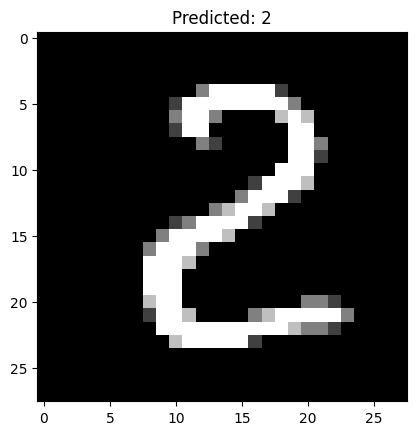

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


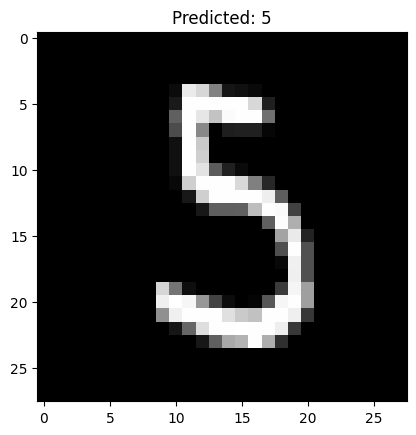

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


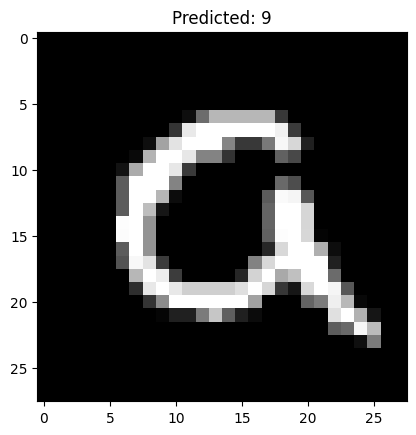

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


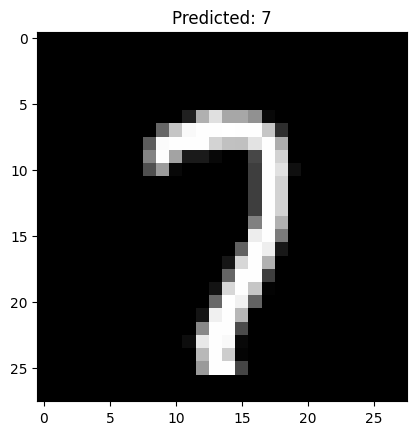

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


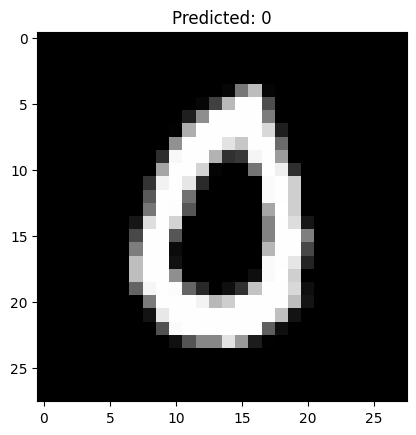

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Load MNIST data (handwritten digits 0-9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Preprocess data
# Normalize pixel values to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape to (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# Step 5: Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Optional: Predict and visualize some test images
import random
indices = random.sample(range(len(X_test)), 5)
for i in indices:
    image = X_test[i].reshape(28,28)
    prediction = np.argmax(model.predict(X_test[i:i+1]))
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {prediction}")
    plt.show()



Task 2: Detect gender of a speaker based on voice data.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Simulated MFCC features for 10 samples (random numbers just for demo)
X = np.random.rand(10, 13)  # 13 MFCC features
y = ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

      female       1.00      1.00      1.00         2
        male       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Task 3: Classify email topics based on content.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Example data (replace with your own dataset)
data = {
    'email_text': [
        "Meeting schedule for next week",
        "Your invoice for last month",
        "New project proposal attached",
        "Reminder: submit your timesheet",
        "Congratulations on your promotion",
        "Your flight booking confirmation",
        "Latest updates on product launch",
        "Invitation to company event",
        "Job application status update",
        "Weekly sales report"
    ],
    'topic': [
        "Work", "Finance", "Work", "Work", "HR",
        "Travel", "Marketing", "HR", "HR", "Sales"
    ]
}

df = pd.DataFrame(data)

# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(df['email_text'], df['topic'], test_size=0.3, random_state=42)

# Step 2: Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 3: Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Step 4: Predict & evaluate
y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Finance       0.00      0.00      0.00       1.0
          HR       0.00      0.00      0.00       1.0
      Travel       0.00      0.00      0.00       1.0
        Work       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python